The problem statement given below:

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is.



---
So for this problem statement we will proceed with following steps to classify the target variable i.e. price_range with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost):

- Data training using the mobile price classification dataset. 
- Model creation which will include importing logistic regression from sklearn, initializing the classifier, then fit the training data into it and perform classification.
---

For the dataset being used [click here](https://www.kaggle.com/iabhishekofficial/mobile-price-classification?select=train.csv)



#### Data Preprocessing and Exploration.

In [1]:
#importing pandas library.
import pandas as pd

In [3]:
data=pd.read_csv('/content/train.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [4]:
#to view shape of the dataset i.e. total number of rows and columns.
data.shape

(2000, 21)

In [5]:
#to view first 5 rows of the dataset.
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
#to view last 5 rows of the dataset.
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [7]:
#to view all the different columns of the dataset.
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
#to view memory usage, non-null values, datatypes of columns.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
#to view statistical summary of the dataset.
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
#to check for any missing or null values in the dataset.
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [11]:
#to view total null values in the dataset.
data.isnull().sum().sum()

0

This means that the dataset has no null values i.e. dataset is cleaned and proper.

We can now proceed with further steps.

In [12]:
#converting data into int datatype to avoid errors below.
prepareddata=data.astype(int)
prepareddata.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2,0,1,0,7,0,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0,1,0,1,53,0,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0,1,2,1,41,0,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2,0,0,0,10,0,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1,0,13,1,44,0,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


### Step 2: Data Visualization.

In [13]:
# importing libaries for data visualization.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

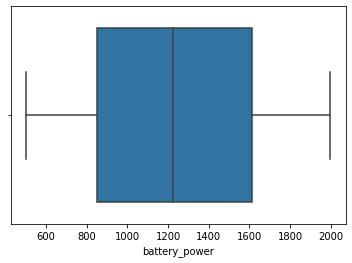

In [14]:
sns.boxplot(x=prepareddata['battery_power'])

Text(0.5, 1.0, 'Clock Speed of the Mobile ')

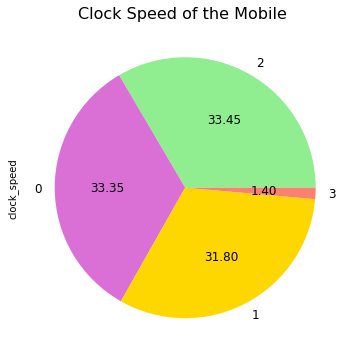

In [15]:
prepareddata['clock_speed'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12,colors=['lightgreen','orchid','gold','salmon'])
plt.title("Clock Speed of the Mobile ",fontsize=16)

Text(0.5, 1.0, 'If the Mobile is dual sim ?')

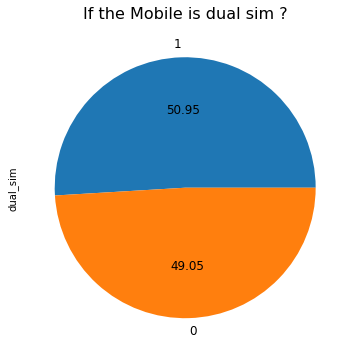

In [16]:
prepareddata['dual_sim'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12)
plt.title("If the Mobile is dual sim ?",fontsize=16)

Text(0.5, 1.0, 'If the Mobile is 4G ?')

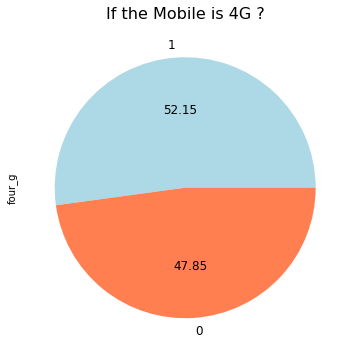

In [17]:
prepareddata['four_g'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12,colors=['lightblue','coral'])
plt.title("If the Mobile is 4G ?",fontsize=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


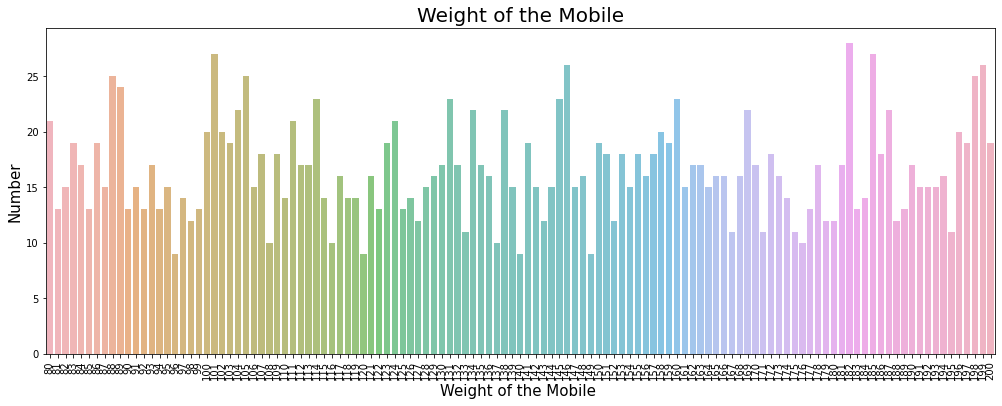

In [18]:
count=prepareddata['mobile_wt'].value_counts()
plt.figure(figsize=(17,6))
sns.barplot(count.index,count.values, alpha=0.7)
plt.title("Weight of the Mobile", fontsize=20)
plt.ylabel('Number', fontsize=15)
plt.xlabel("Weight of the Mobile ", fontsize=15)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'If the Mobile is 3G ?')

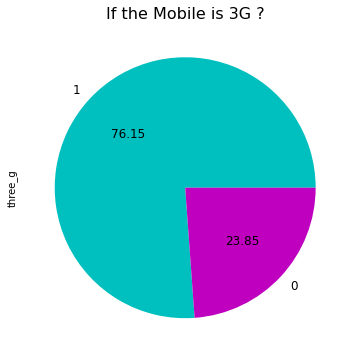

In [19]:
prepareddata['three_g'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12,colors=['c','m'])
plt.title("If the Mobile is 3G ?",fontsize=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


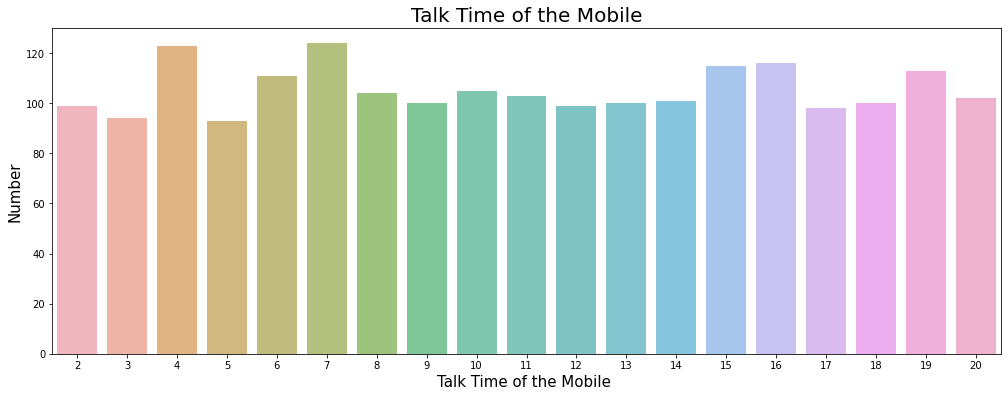

In [20]:
count=prepareddata['talk_time'].value_counts()
plt.figure(figsize=(17,6))
sns.barplot(count.index,count.values, alpha=0.7)
plt.title("Talk Time of the Mobile", fontsize=20)
plt.ylabel('Number', fontsize=15)
plt.xlabel("Talk Time of the Mobile ", fontsize=15)
plt.show()

Text(0.5, 1.0, 'If the Mobile is touch screen ?')

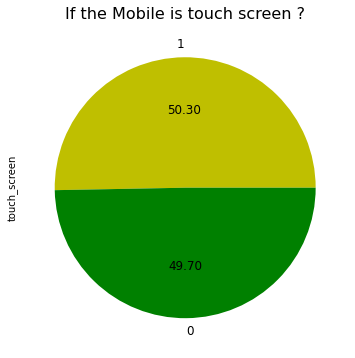

In [21]:
prepareddata['touch_screen'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12,colors=['y','g'])
plt.title("If the Mobile is touch screen ?",fontsize=16)

Text(0.5, 1.0, 'If the Mobile has WIFI ?')

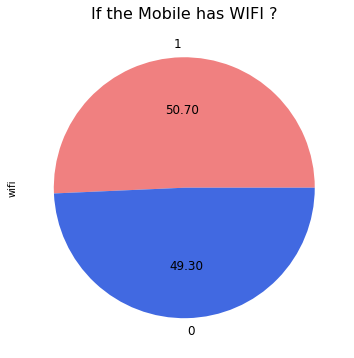

In [22]:
prepareddata['wifi'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12,colors=['lightcoral','royalblue'])
plt.title("If the Mobile has WIFI ?",fontsize=16)

### Step 3: Data Training & Model Creation.

Data Training:

In [23]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
# Here, x is the data which will have features for classification and y will have our target i.e. price range of the mobiles.
x=prepareddata.drop(['price_range'],axis=1)  
y=prepareddata['price_range']

In [24]:
# Split data into training data and testing data.
#Ratio used for splitting training and testing data is 8:2 respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=100)

Model Creation:

In [25]:
# Importing logistic regression model
from sklearn.linear_model import LogisticRegression 
clfr = LogisticRegression()

In [26]:
#Fitting data into the model.
clfr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
# Making predictions 
pred = clfr.predict(x_test)

In [28]:
pred

array([0, 2, 1, 3, 3, 3, 3, 3, 3, 1, 0, 2, 3, 3, 1, 1, 3, 2, 2, 0, 0, 2,
       1, 0, 0, 1, 2, 1, 1, 2, 0, 3, 0, 3, 1, 3, 3, 1, 2, 3, 3, 3, 0, 0,
       3, 3, 2, 0, 2, 2, 3, 2, 3, 3, 3, 3, 1, 3, 1, 0, 3, 2, 3, 0, 3, 0,
       0, 3, 3, 3, 0, 1, 3, 1, 1, 3, 0, 2, 1, 3, 1, 0, 2, 1, 1, 3, 3, 1,
       3, 1, 2, 2, 3, 1, 0, 2, 3, 0, 1, 1, 0, 0, 3, 2, 3, 0, 0, 1, 0, 3,
       1, 2, 3, 1, 0, 3, 2, 1, 1, 1, 2, 1, 0, 1, 3, 2, 2, 3, 0, 2, 2, 0,
       0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 3, 1, 3, 2, 2, 0, 2, 0, 3, 2, 2,
       3, 0, 2, 3, 0, 1, 3, 2, 3, 0, 1, 3, 0, 3, 3, 0, 2, 1, 2, 1, 1, 1,
       3, 1, 2, 0, 1, 1, 1, 0, 0, 3, 3, 2, 3, 1, 2, 2, 1, 1, 3, 3, 3, 1,
       2, 2, 2, 2, 3, 2, 3, 1, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2, 2, 0, 2, 3,
       0, 3, 1, 0, 1, 1, 1, 2, 2, 0, 1, 1, 0, 1, 0, 3, 3, 2, 2, 1, 2, 3,
       2, 1, 1, 2, 3, 1, 3, 2, 1, 3, 2, 0, 3, 3, 3, 1, 3, 3, 3, 3, 2, 3,
       1, 2, 3, 0, 1, 0, 0, 3, 2, 1, 1, 1, 1, 3, 2, 2, 2, 1, 3, 2, 0, 2,
       3, 1, 0, 1, 2, 2, 1, 2, 2, 0, 2, 3, 0, 3, 3,

### Step 4: Performance Evaluation

In [29]:
import numpy as np
from sklearn.metrics import mean_squared_error
print("Model\t\t\t    RootMeanSquareError   \t\t   Accuracy of the model")
print("""Logistic Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred)), clfr.score(x_train,y_train)))

Model			    RootMeanSquareError   		   Accuracy of the model
Logistic Regression 		 0.6801 	 		 0.6456


Conclusion drawn:

- Logistic Regression is one of the highly used algorithm for  various classification tasks.

- For this project i.e. mobile price range classification, accuracy of Logistic Regression is 64.56%